In [2]:
import warnings
warnings.filterwarnings("ignore") 
from IPython.core.display import display, HTML

import time

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import scipy.stats as scs
from scipy.stats import multivariate_normal as mvn
import sklearn.mixture as mix

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('dist4.csv')

In [5]:
data

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,STATE_UT_NAME
0,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,ANDAMAN And NICOBAR ISLANDS
1,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,ANDAMAN And NICOBAR ISLANDS
2,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,ANDAMAN And NICOBAR ISLANDS
3,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,ARUNACHAL PRADESH
4,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,ARUNACHAL PRADESH
5,28.0,48.3,85.3,101.5,140.5,228.4,217.4,182.8,159.8,75.9,20.9,11.6,1300.4,ARUNACHAL PRADESH
6,42.2,72.7,141.0,316.9,328.7,614.7,851.9,500.6,418.3,218.7,42.9,22.9,3571.5,ARUNACHAL PRADESH
7,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,ARUNACHAL PRADESH
8,83.7,153.9,303.5,383.6,268.0,374.2,272.0,160.5,266.7,167.2,64.0,56.0,2553.3,ARUNACHAL PRADESH
9,70.3,170.9,367.9,554.4,334.2,526.2,460.8,291.5,353.6,275.0,64.9,74.2,3543.9,ARUNACHAL PRADESH


In [6]:
mcg = data['JAN']

In [7]:
def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        print('\nIteration: ', i)
        print()
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()
        
        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()

        new_mus = (np.diag(mus)[0], np.diag(mus)[1])
        new_sigs = (np.unique(np.diag(sigmas[0]))[0], np.unique(np.diag(sigmas[1]))[0])
        df = (pd.DataFrame(index=[1, 2]).assign(mus = new_mus).assign(sigs = new_sigs))
        
        xx = np.linspace(0, 100, 100)
        yy = scs.multivariate_normal.pdf(xx, mean=new_mus[0], cov=new_sigs[0])
        
        colors = sns.color_palette('Dark2', 3)
        fig, ax = plt.subplots(figsize=(9, 7))
        ax.set_ylim(-0.001, np.max(yy))
        ax.plot(xx, yy, color=colors[1])
        ax.axvline(new_mus[0], ymin=0., color=colors[1])
        ax.fill_between(xx, 0, yy, alpha=0.5, color=colors[1])
        lo, hi = ax.get_ylim()
        #ax.annotate(f'$\mu_1$: {new_mus[0]:3.2f}', fontsize=12, fontweight='demi',xy=(new_mus[0], (hi-lo) / 2), xycoords='data', xytext=(80, (hi-lo) / 2),arrowprops=dict(facecolor='black', connectionstyle="arc3,rad=0.2",shrink=0.05))
        ax.fill_between(xx, 0, yy, alpha=0.5, color=colors[2])
        
        yy2 = scs.multivariate_normal.pdf(xx, mean=new_mus[1], cov=new_sigs[1])
        
        ax.plot(xx, yy2, color=colors[2])
        ax.axvline(new_mus[1], ymin=0., color=colors[2])
        lo, hi = ax.get_ylim()
        #ax.annotate(f'$\mu_2$: {new_mus[1]:3.2f}', fontsize=12, fontweight='demi',xy=(new_mus[1], (hi-lo) / 2), xycoords='data', xytext=(25, (hi-lo) / 2),arrowprops=dict(facecolor='black', connectionstyle="arc3,rad=0.2",shrink=0.05))
        ax.fill_between(xx, 0, yy2, alpha=0.5, color=colors[2])
        
        dot_kwds = dict(markerfacecolor='white', markeredgecolor='black', markeredgewidth=1, markersize=10)
        ax.plot(mcg, len(mcg)*[0], 'o', **dot_kwds)
        ax.set_ylim(-0.001, np.max(yy2))
        
        
        print(df.T)   
        
        # update complete log likelihoood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)
        print(ll_new)
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new
        
    return ll_new, pis, mus, sigmas

('\nIteration: ', 0)
()
               1           2
mus    31.458886   35.054140
sigs  702.115433  709.501249
-2950.88600054
('\nIteration: ', 1)
()
              1           2
mus    31.56214   35.149879
sigs  700.98995  708.909803
-2950.86221012
('\nIteration: ', 2)
()
               1           2
mus    31.681812   35.259948
sigs  699.657307  708.206733
-2950.8419151
('\nIteration: ', 3)
()
               1           2
mus    31.816609   35.383498
sigs  698.108338  707.402097
-2950.82248655
('\nIteration: ', 4)
()
               1           2
mus    31.966087   35.520376
sigs  696.344173  706.483667
-2950.80239478
('\nIteration: ', 5)
()
               1           2
mus    32.130439   35.670961
sigs  694.355674  705.435866
-2950.78061811
('\nIteration: ', 6)
()
               1           2
mus    32.310398   35.836084
sigs  692.124136  704.239381
-2950.75632391
('\nIteration: ', 7)
()
               1           2
mus    32.507195   36.017008
sigs  689.621194  702.870302
-2950.72868

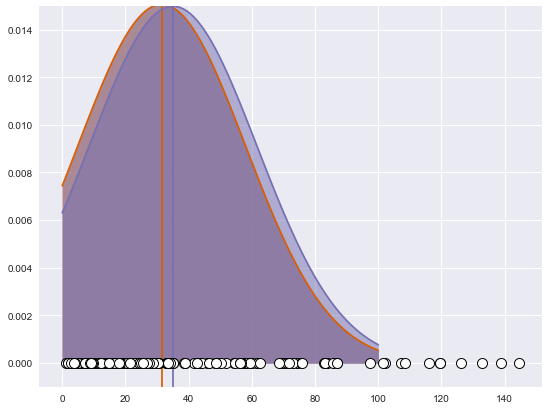

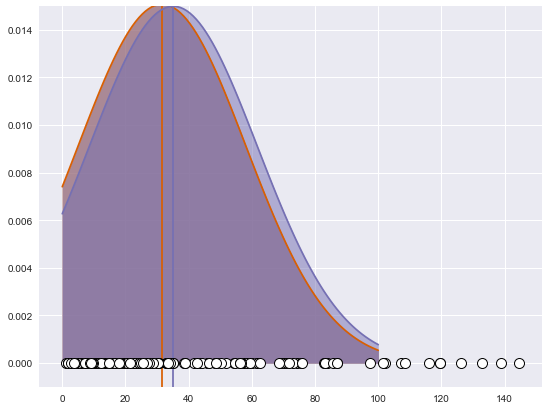

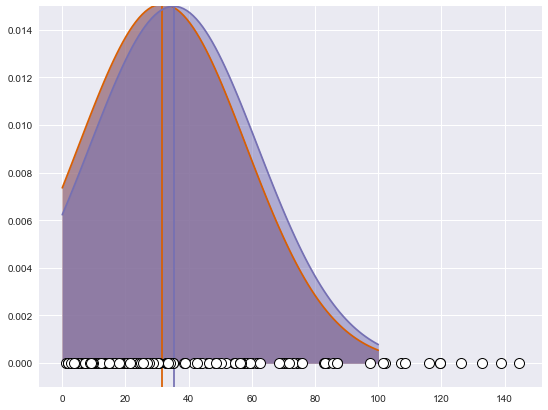

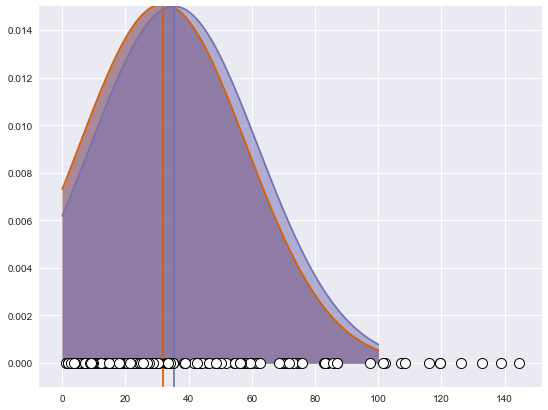

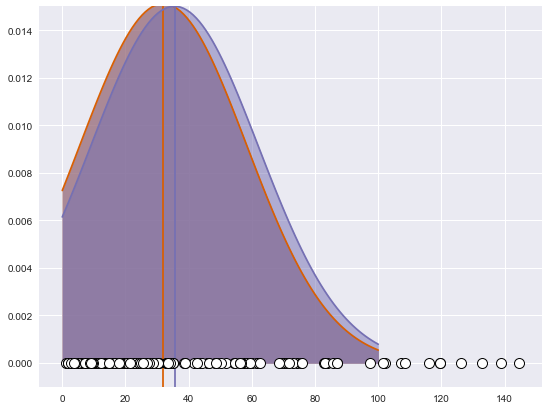

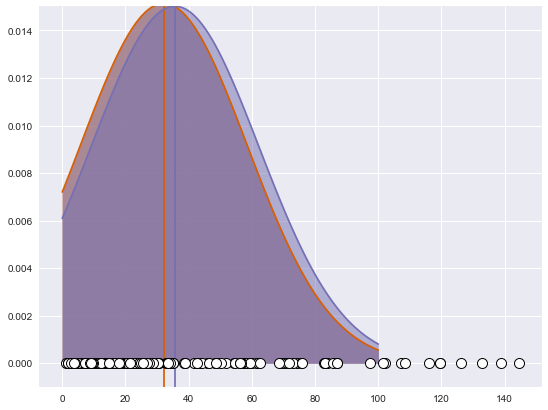

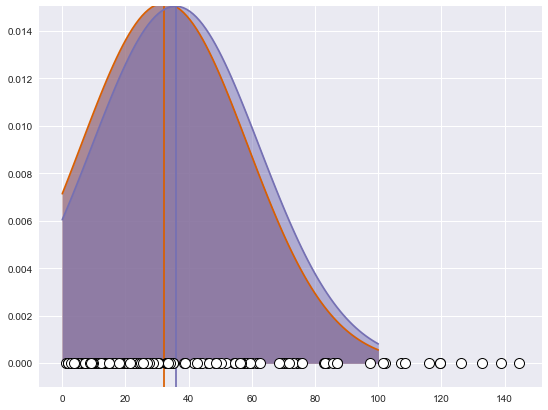

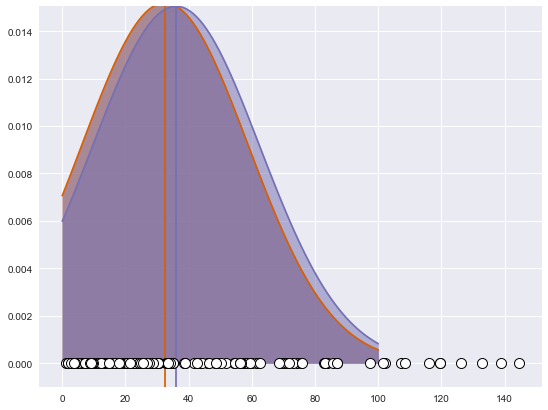

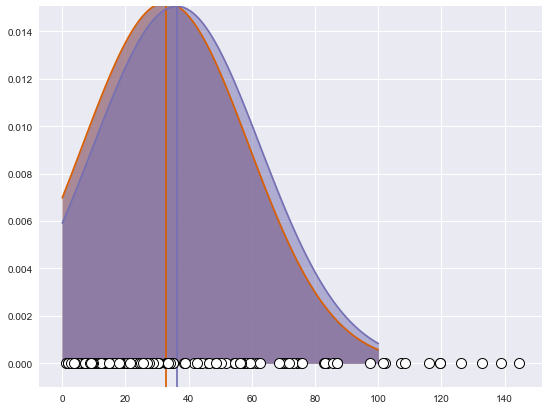

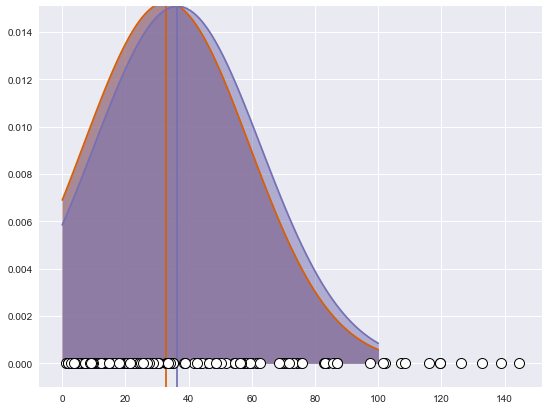

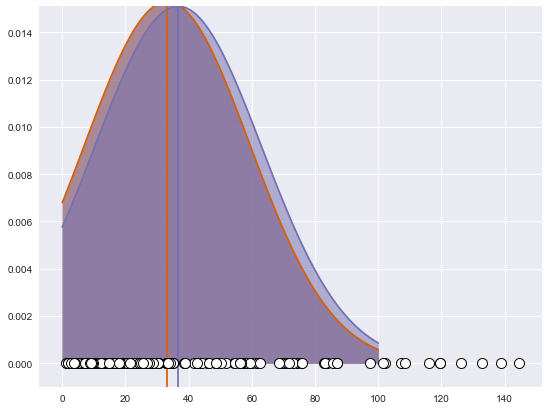

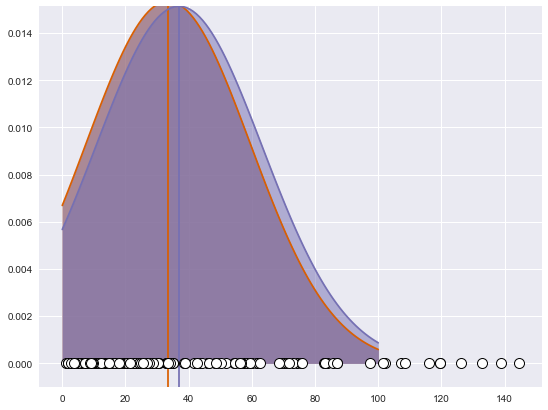

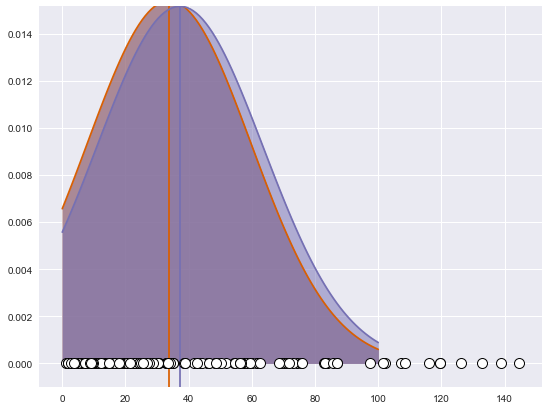

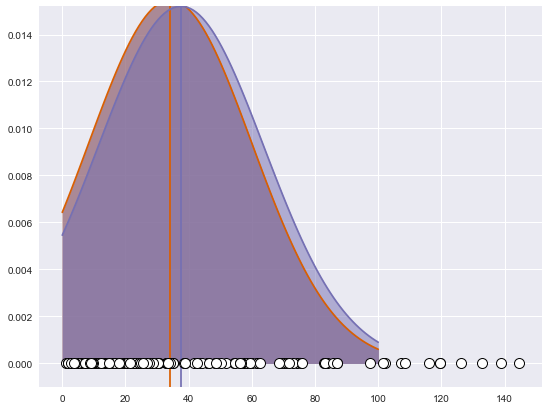

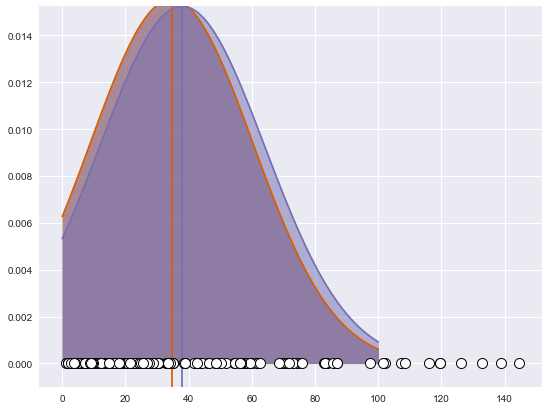

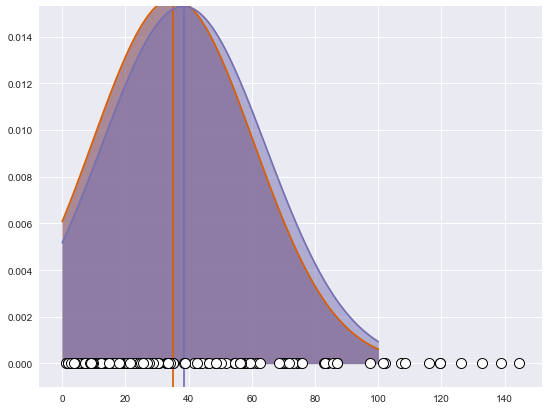

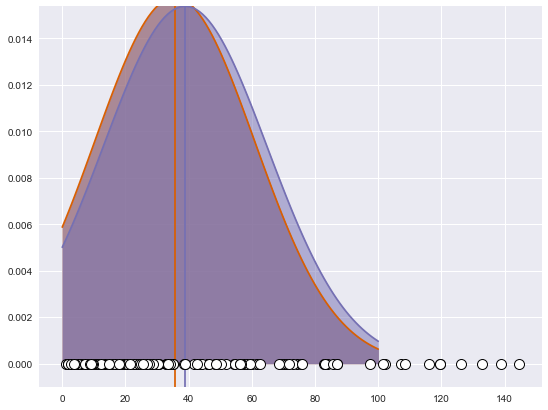

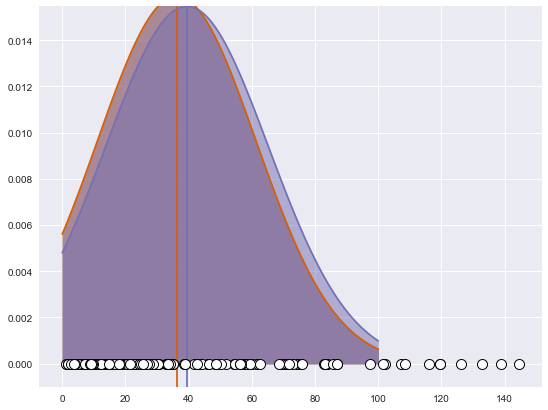

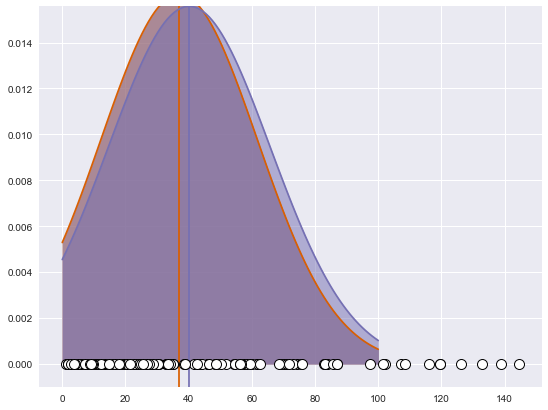

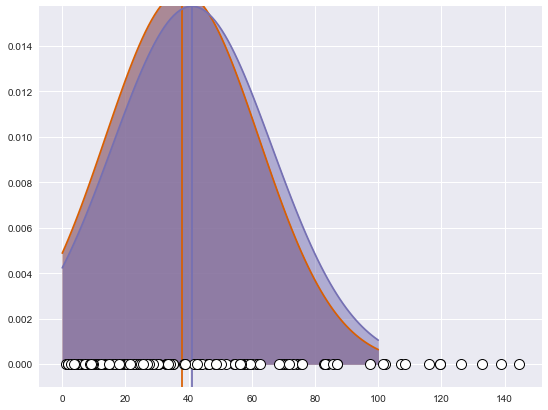

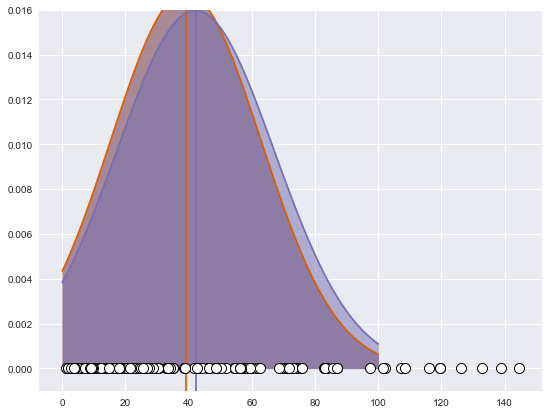

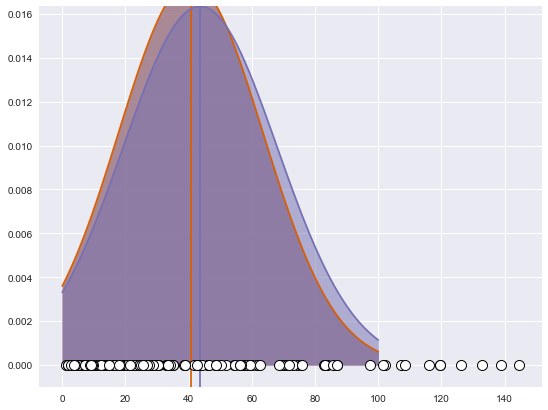

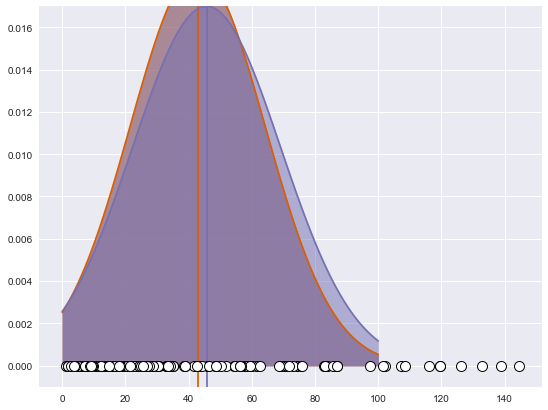

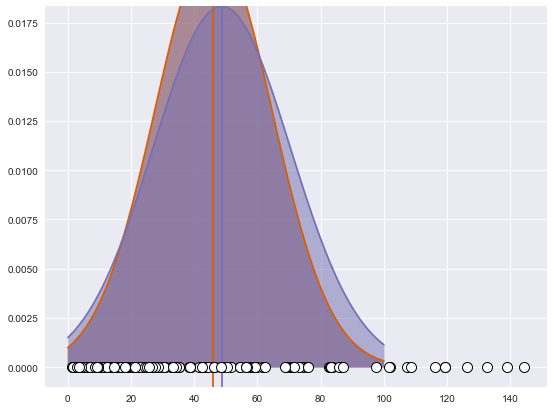

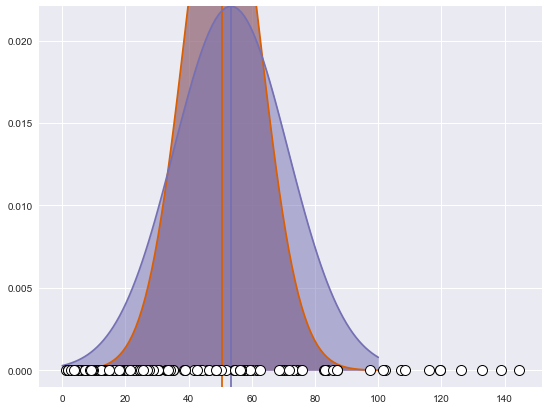

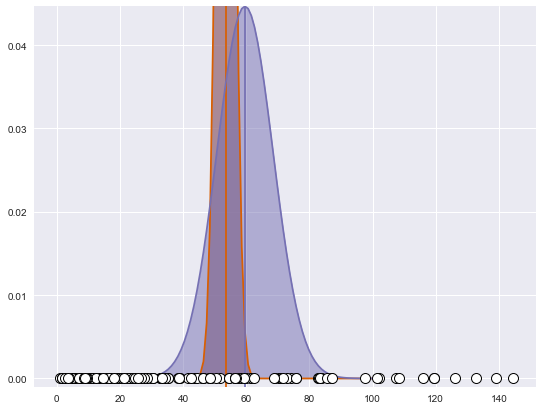

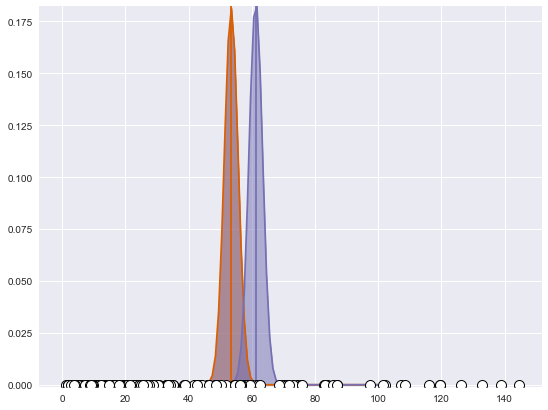

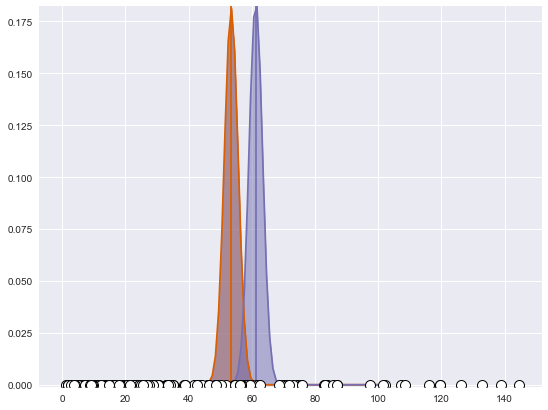

In [9]:
mcg = data['JAN']
n = len(mcg)

# Ground truthish
_mus = np.array([[0, data.groupby('STATE_UT_NAME').mean().iat[0, 0]], 
                 [data.groupby('STATE_UT_NAME').mean().iat[1, 0], 0]])
_sigmas = np.array([[[5, 0], [0, 5]], 
                    [[5, 0],[0, 5]]])
_pis = np.array([0.5, 0.5]) # priors

# initial random guesses for parameters
np.random.seed(0)

pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2) * mcg.std()

# generate our noisy x values
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

ll, pis, mus, sigmas = em_gmm_orig(xs, pis, mus, sigmas)

# In the below plots the white dots represent the observed heights.